<a href="https://colab.research.google.com/github/ArashDehghanyan/Hands-On_Machine_Learning/blob/main/Hands_on_ml_example_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
# Import common modules
import sys
import sklearn
import numpy as np
import os
assert sys.version_info >= (3, 5)
assert sklearn.__version__ >= "0.20"
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# where to save figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    """Saves created figures on your storage device."""
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


#Download Data

In [76]:
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = os.path.join(DOWNLOAD_ROOT + HOUSING_PATH, "housing.tgz")

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    """Downloads data from the specified url to
     the given directory on your device."""

    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [77]:
fetch_housing_data()

In [78]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [79]:
# Load data
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [80]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [81]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [82]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figure attribute_histpogram_plots


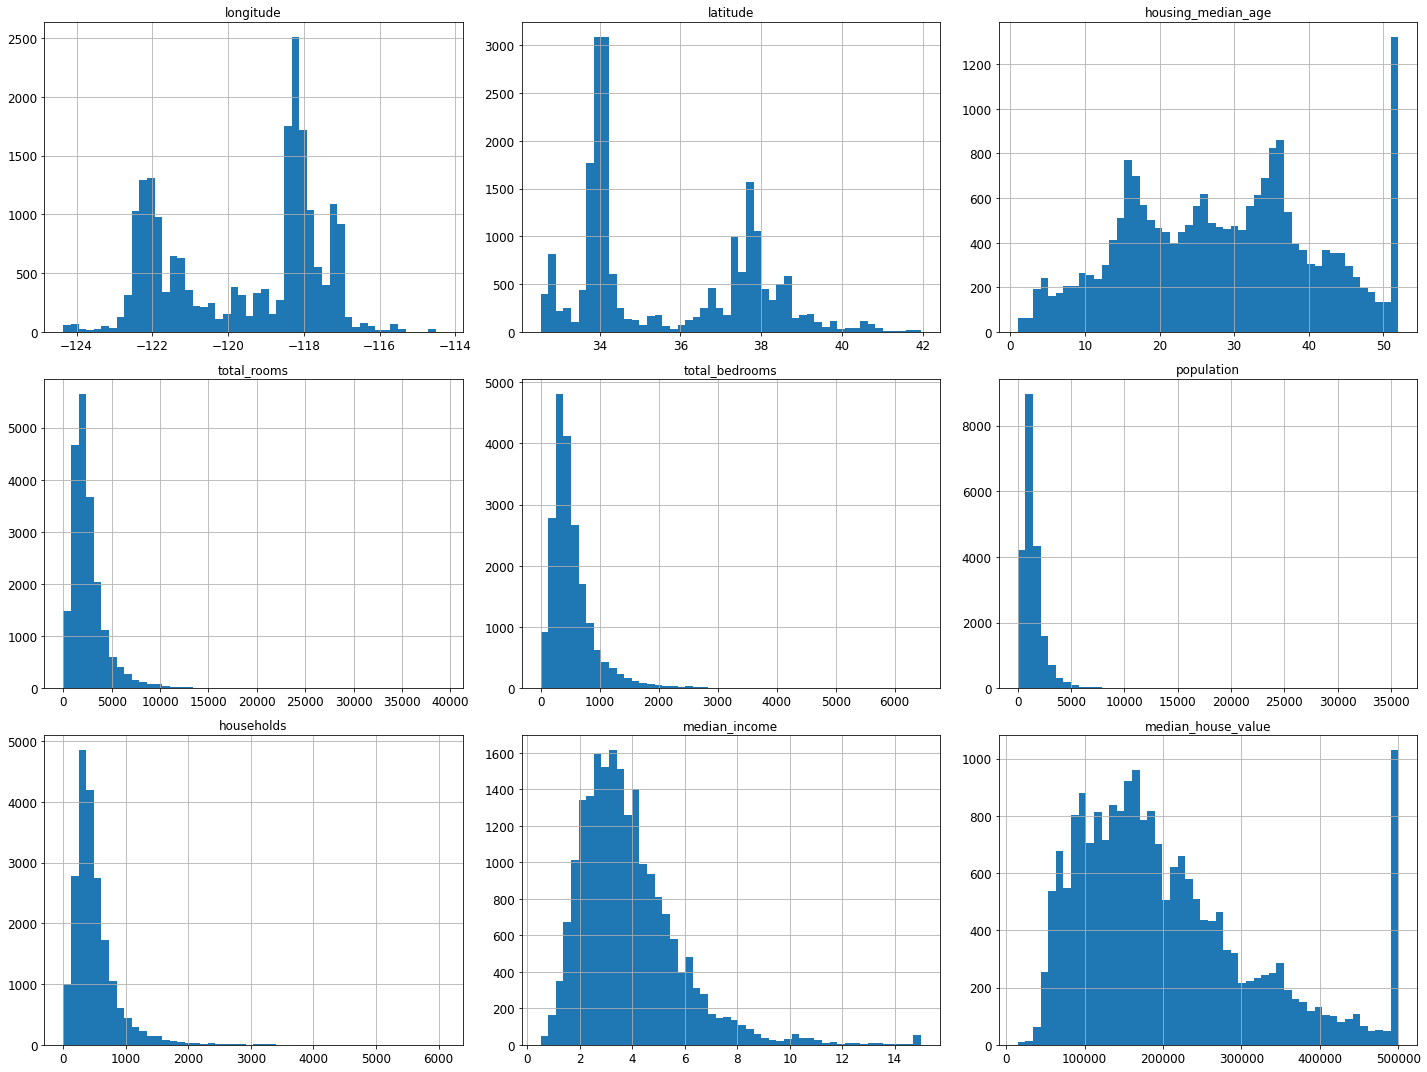

In [83]:
housing.hist(bins=50, figsize=(20, 15))
save_fig("attribute_histpogram_plots")
plt.show()

#Create a test set

In [84]:
np.random.seed(3745)

def split_train_test(data, test_ratio):
    """Splits dataset to train and test sets using test_ratio."""
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [85]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set))
print(len(test_set))

16512
4128


In [86]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]
    

In [87]:
housing_with_id = housing.reset_index() # adds an index column
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [88]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [89]:
print(len(train_set)); print(len(test_set))

16512
4128


In [90]:
housing_with_id['id'] = housing['longitude'] * 1000 + housing['latitude']
housing_with_id['id']

0       -122192.12
1       -122182.14
2       -122202.15
3       -122212.15
4       -122212.15
           ...    
20635   -121050.52
20636   -121170.51
20637   -121180.57
20638   -121280.57
20639   -121200.63
Name: id, Length: 20640, dtype: float64

In [91]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")
print(len(train_set)); print(len(test_set));

16322
4318


In [92]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=3745)
print(len(train_set)); print(len(test_set))

16512
4128


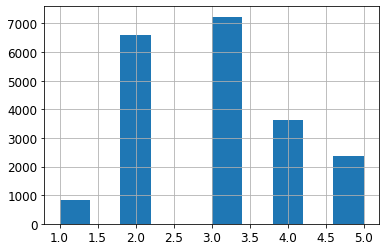

In [93]:
# Categorize median income to 5 category
housing['income_cat'] = pd.cut(housing['median_income'], 
                               bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf], 
                               labels=[1, 2, 3, 4, 5])
housing['income_cat'].hist()

# Stratified shuffle sampling

In [94]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=3745)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [95]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [96]:
housing['income_cat'].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [97]:
# Remove the 'income_cat' attribute from test and train data
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)
strat_train_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [98]:
copy_housing = strat_train_set.copy()

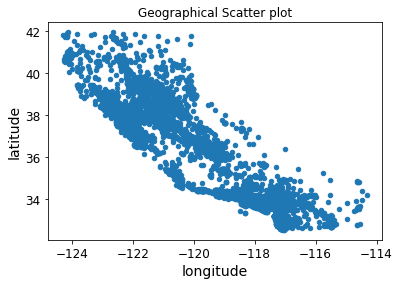

In [99]:
# Visualizing geographical data
copy_housing.plot(kind='scatter', x='longitude', y='latitude')
plt.title("Geographical Scatter plot")
plt.show()

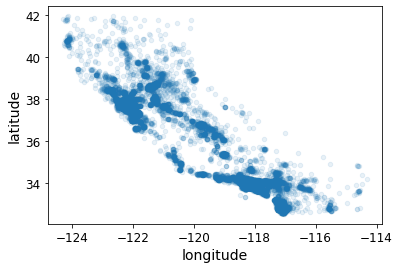

In [100]:
copy_housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

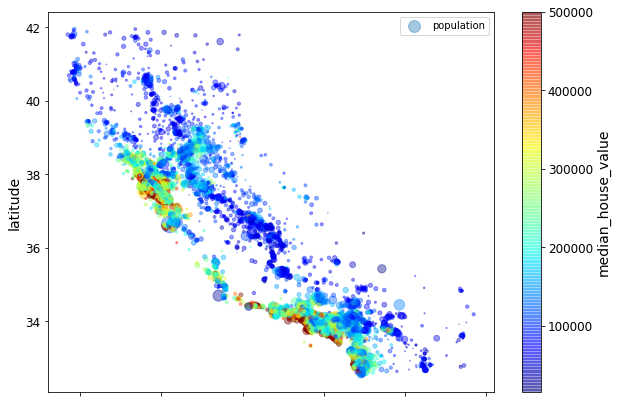

In [101]:
copy_housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, 
                  s=copy_housing['population']/100, label='population', 
                  figsize=(10, 7), c="median_house_value", 
                  cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()
plt.show()

# Correlation between features

In [102]:
corr_matrix = copy_housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924431,-0.108786,0.047507,0.072035,0.102688,0.057707,-0.016224,-0.045251
latitude,-0.924431,1.000000,0.010439,-0.038439,-0.068973,-0.112335,-0.073451,-0.079679,-0.145504
housing_median_age,-0.108786,0.010439,1.000000,-0.357301,-0.316607,-0.297811,-0.299608,-0.121287,0.104338
total_rooms,0.047507,-0.038439,-0.357301,1.000000,0.931064,0.864699,0.918949,0.202729,0.140476
total_bedrooms,0.072035,-0.068973,-0.316607,0.931064,1.000000,0.886415,0.980233,-0.002491,0.055763
population,0.102688,-0.112335,-0.297811,0.864699,0.886415,1.000000,0.914518,0.011155,-0.017190
households,0.057707,-0.073451,-0.299608,0.918949,0.980233,0.914518,1.000000,0.018678,0.072346
median_income,-0.016224,-0.079679,-0.121287,0.202729,-0.002491,0.011155,0.018678,1.000000,0.687870
median_house_value,-0.045251,-0.145504,0.104338,0.140476,0.055763,-0.017190,0.072346,0.687870,1.000000


In [103]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687870
total_rooms           0.140476
housing_median_age    0.104338
households            0.072346
total_bedrooms        0.055763
population           -0.017190
longitude            -0.045251
latitude             -0.145504
Name: median_house_value, dtype: float64

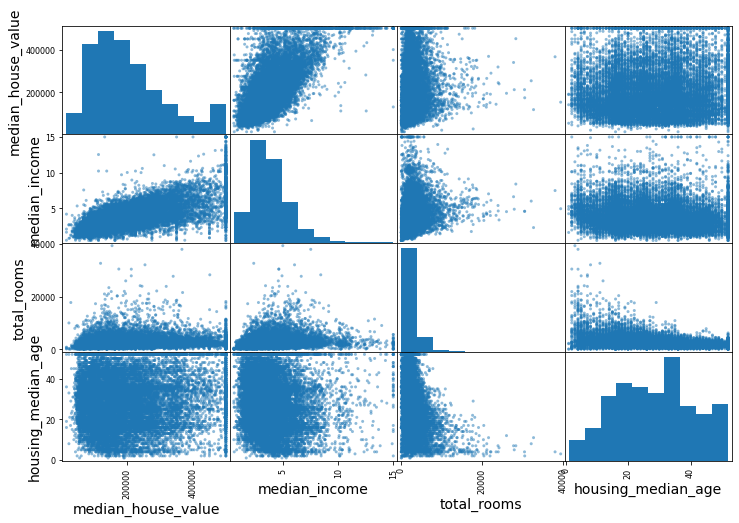

In [104]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", 
              "total_rooms", "housing_median_age"]

scatter_matrix(copy_housing[attributes], figsize=(12, 8))
plt.show()

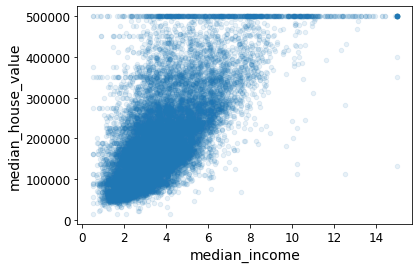

In [105]:
# The most promising to predict the median house value is median income
copy_housing.plot(kind='scatter', x='median_income', y='median_house_value', 
                  alpha=0.1)
plt.show()

#Attribute Combination

In [106]:
copy_housing["rooms_per_household"] = copy_housing["total_rooms"] / copy_housing["households"]
copy_housing["bedrooms_per_room"] = copy_housing['total_bedrooms'] / copy_housing['total_rooms']
copy_housing["population_per_household"] = copy_housing['population'] / copy_housing['households']

In [107]:
corr_matrix = copy_housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687870
rooms_per_household         0.148078
total_rooms                 0.140476
housing_median_age          0.104338
households                  0.072346
total_bedrooms              0.055763
population                 -0.017190
population_per_household   -0.026318
longitude                  -0.045251
latitude                   -0.145504
bedrooms_per_room          -0.255042
Name: median_house_value, dtype: float64

#Prepare Data for Machine Learning

In [108]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

##Data Cleaning

In [109]:
# Handling misssing features

# get rid of corresponding samples
# housing.dropna(subset=['total_bedrooms'])

# get rid of whole attribute
# housing.drop("total_bedrooms", axis=1)

# Set missing values with desired values e.g., zero, mean, median, etc
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median, inplace=True)

In [110]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

# Drop text attributes because median can only compute on numerical ones
housing_num = housing.drop("ocean_proximity", axis=1)

# Fit the imputer to the training data
imputer.fit(housing_num)


SimpleImputer(strategy='median')

In [111]:
imputer.statistics_

array([-118.5   ,   34.26  ,   29.    , 2127.    ,  434.    , 1169.    ,
        409.5   ,    3.5341])

In [112]:
housing_num.median().values

array([-118.5   ,   34.26  ,   29.    , 2127.    ,  434.    , 1169.    ,
        409.5   ,    3.5341])

In [113]:
# Transform the training dataset by replacing missing values
X = imputer.transform(housing_num)  # The rsult is numpy array

# Convert numpy array to pandas DataFrame
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

##Handling Text attributes

In [115]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
13378,INLAND
17297,<1H OCEAN
2241,INLAND
16974,NEAR OCEAN
6664,<1H OCEAN
133,NEAR BAY
1024,INLAND
4850,<1H OCEAN
2567,NEAR OCEAN
12027,INLAND


In [116]:
# Convert categories to numbers
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [0.],
       [1.],
       [4.],
       [0.],
       [3.],
       [1.],
       [0.],
       [4.],
       [1.]])

In [117]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [118]:
# Convert categorical values to One hot vectors
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [119]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [120]:
housing_cat_1hot.todense()

matrix([[0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        ...,
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.]])